# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

dice_choices = [1,2,3,4,5,6]

def rolling(x,y):
    return rd.choices(x,k=y)

results = rolling(dice_choices,10)
print(results)

df= pd.DataFrame(results,columns=['dice_result'])

display(df)

[4, 2, 4, 3, 6, 2, 1, 4, 4, 4]


,dice_result
0,4
1,2
2,4
3,3
4,6
5,2
6,1
7,4
8,4
9,4


#### 2.- Plot the results sorted by value.

,dice_result
6,1
1,2
5,2
3,3
0,4
2,4
7,4
8,4
9,4
4,6


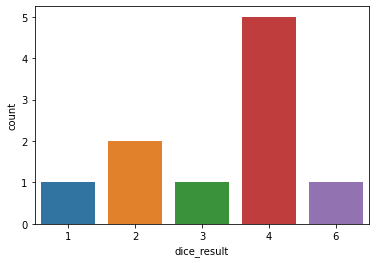

In [3]:
# your code here
display(df.sort_values(by=['dice_result']))

sns.countplot(data=df, x='dice_result')



#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

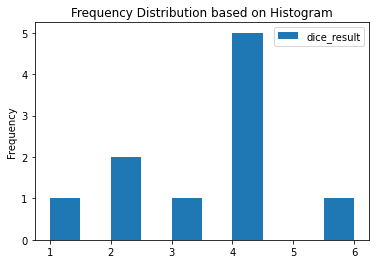

In [4]:
# your code here

df.plot(kind='hist', title = 'Frequency Distribution based on Histogram')



In [5]:
"""
The frequency distribution shows whole results possible even if they are not ocurring in the statistical sample. The first plot just the results.
"""

'\nThe frequency distribution shows whole results possible even if they are not ocurring in the statistical sample. The first plot just the results.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def mean(x):
    return sum(x)/len(x)

mean(df['dice_result'])

3.4

In [7]:
#contrasting 
print(df['dice_result'].mean())

3.4


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

df1 = pd.Series(df['dice_result']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df1.columns = ['choices', 'frequency']
df1

df2= pd.DataFrame(dice_choices,columns = ['choices'])

df3 = pd.merge(df2,df1,how = 'left', on = 'choices')
df3['frequency'] = df3['frequency'].fillna(0)

display(df3)

def mean_2(x):
    value = sum(x['choices']*x['frequency'])
    return value/sum(x['frequency'])

print(mean_2(df3))

,choices,frequency
0,1,1.0
1,2,2.0
2,3,1.0
3,4,5.0
4,5,0.0
5,6,1.0


3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# x must be the serie you want to calculate the median

# your code here
def median(x):
    sorted_list = sorted(x)
    value = int(len(x)/2)
    if value % 2 == 0:
        return sorted_list[value]
    else: 
        return (sorted_list[value]+sorted_list[value-1])/2
    
median(df['dice_result'])




4.0

In [10]:
#comparison
print(df['dice_result'].median())

4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here

def dice_quartiles(x):

    Q2 = median(x)
    Q1 = (x.min() + Q2) / 2
    Q3 = (x.max() + Q2) / 2
    
    print(f' First Q = {Q1}\n Second Q = {Q2}\n Third Q = {Q3}')
    
dice_quartiles(df['dice_result'])


 First Q = 2.5
 Second Q = 4.0
 Third Q = 5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

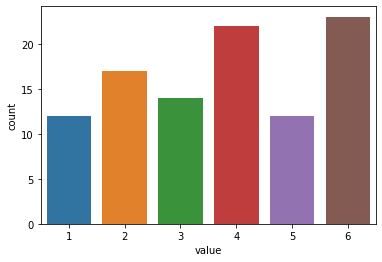

In [12]:
# your code here

dices = pd.read_csv("../data/roll_the_dice_hundred.csv")

sns.countplot(data=dices, x='value');

In [13]:
dices

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [14]:
"""
Not enough data to have equally result into the numbers.
"""

'\nNot enough data to have equally result into the numbers.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [15]:
# your code here

mean(dices['value'])


3.74

#### 3.- Now, calculate the frequency distribution.


In [16]:
# your code here
df_dices = pd.Series(dices['value']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df_dices.columns = ['choices', 'frequency']
df_dices

,choices,frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

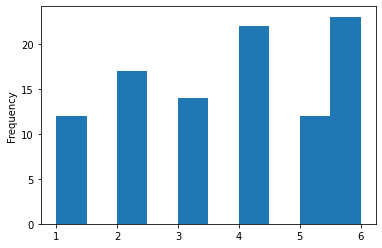

In [17]:
# your code here

dices['value'].plot(kind = 'hist')


In [18]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

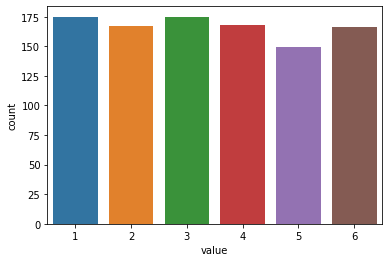

In [19]:
# your code here

dices_1000 = pd.read_csv("../data/roll_the_dice_thousand.csv")

sns.countplot(data=dices_1000, x='value');

In [20]:
"""
More samples more equitative.
"""

'\nMore samples more equitative.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

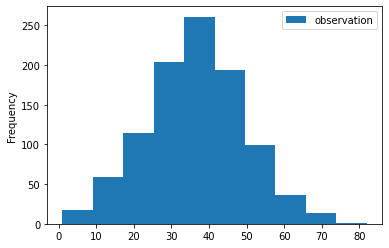

In [21]:
# your code here

df = pd.read_csv('../data/ages_population.csv')

df.plot(kind = 'hist')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [22]:
# your code here

print(df['observation'].mean())
print(df['observation'].std())

36.56
12.81649962597677


In [23]:
"""
Yes!!
"""

'\nYes!!\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

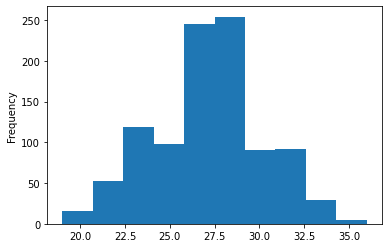

In [24]:
# your code here
ages_2 = pd.read_csv("../data/ages_population2.csv")
ages_2['observation'].plot(kind = 'hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [25]:
"""
More values next to the mean!
"""

'\nMore values next to the mean\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [26]:
# your code here

print(ages_2['observation'].mean())
print(ages_2['observation'].std())

27.155
2.9698139326891835


In [27]:
"""
less standard desviation
"""

'\nless standard desviation\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

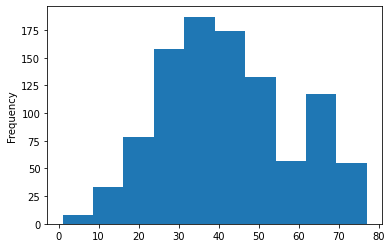

In [28]:
# your code here

ages_3 = pd.read_csv("../data/ages_population3.csv")
ages_3['observation'].plot(kind = 'hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [29]:
# your code here
print(ages_3['observation'].mean())
print(ages_3['observation'].std())

41.989
16.14470595986593


In [30]:
"""
Data of old people more relevant in this data set
"""

'\nData of old people more relevant in this data set\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [37]:
# your code here
dice_quartiles(ages_3['observation'])

 First Q = 20.5
 Second Q = 40.0
 Third Q = 58.5


In [32]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [40]:
# your code here
ages_3['observation'].quantile(np.arange(0.0, 1.0, 0.1))

0.0     1.0
0.1    22.0
0.2    28.0
0.3    32.0
0.4    36.0
0.5    40.0
0.6    45.0
0.7    50.0
0.8    57.0
0.9    67.0
Name: observation, dtype: float64

In [34]:
"""
Between the percentil 0.2 and 0.8 
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [35]:
# your code here

In [36]:
"""
your comments here
"""

'\nyour comments here\n'